#### Import Libraries

In [11]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import (silhouette_score, davies_bouldin_score, calinski_harabasz_score)

In [12]:
# Load Dataset
df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [15]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [16]:
columns_to_drop = ['Hemisphere', 'Patient ID', 'Continent', 'Patient ID', 'Family History', 'Sex', 'Country', 'Income', 'Diet', 'Obesity', 'Smoking', 'Blood Pressure', 'Alcohol Consumption', 'Exercise Hours Per Week','Previous Heart Problems', 'Medication Use', 'Sedentary Hours Per Day','Physical Activity Days Per Week', 'Sleep Hours Per Day']
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Stress Level,BMI,Triglycerides,Heart Attack Risk
0,67,208,72,0,9,31.251233,286,0
1,21,389,98,1,1,27.194973,235,0
2,21,324,72,1,9,28.176571,587,0
3,84,383,73,1,9,36.464704,378,0
4,66,318,93,1,6,21.809144,231,0


In [17]:
x = df.drop('Heart Attack Risk', axis = 1)
y = df['Heart Attack Risk']

In [18]:
# Splitting Data into Training and Test sets 

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

#### KMeans

In [19]:
kmeans_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.9)),   
    ("cluster", KMeans(n_clusters=3, random_state=42, n_init=10))
])


#### Hierarchical

In [20]:
hierarchical_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.9)),   
    ("cluster", AgglomerativeClustering(
        n_clusters=3,
        linkage="ward"
    ))
])

#### DBSCAN

In [21]:
dbscan_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.9)), 
    ("cluster", DBSCAN(
        eps=0.5,
        min_samples=5
    ))
])

In [22]:
pipelines = {
    "KMeans": kmeans_pipeline,
    "Hierarchical": hierarchical_pipeline,
    "DBSCAN": dbscan_pipeline
}

results = []

for name, pipe in pipelines.items():
    print(f"\n {name} ")

    pipe.fit(x)   # X = feature matrix

    labels = pipe.named_steps["cluster"].labels_

    # DBSCAN may assign all points as noise
    if len(set(labels)) <= 1:
        print("Only one cluster (or noise). Skipping metrics.")
        continue

    silhouette = silhouette_score(x, labels)
    db_index = davies_bouldin_score(x, labels)
    ch_index = calinski_harabasz_score(x, labels)

    results.append({
        "Model": name,
        "Num_Clusters": len(set(labels)) - (1 if -1 in labels else 0),
        "Silhouette": silhouette,
        "Davies_Bouldin": db_index,
        "Calinski_Harabasz": ch_index
    })



 KMeans 


C:\Users\josep\anaconda3\envs\mlenv2\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)



 Hierarchical 

 DBSCAN 
Only one cluster (or noise). Skipping metrics.


In [23]:
results_df = pd.DataFrame(results)
results_df

,Model,Num_Clusters,Silhouette,Davies_Bouldin,Calinski_Harabasz
0,KMeans,3,-0.009283,36.310063,6.976456
1,Hierarchical,3,-0.007797,3.378560,873.066816


#### Insight

##### Silhouette Score (Cluster Separation and Cohesion): 

evaluates how well each data point fits within its assigned cluster compared to other clusters, with values ranging from −1 to +1. Both models, K-Means and Hierarchical, have silhouette scores of -0.009 and -0.008, respectively, and are near zero and slightly negative, indicating that cluster separation is weak for both methods. This could be as a result of:

•	A large overlap between the clusters

•	Data points lying near the cluster boundaries

•	The underlying data may not possess a strong natural cluster structure

##### Davies–Bouldin Index (Compactness vs. Separation):

This measures the average similarity that exists between each cluster and its most similar cluster. Lower values indicate better clustering. Hierarchical with Davies-Bouldin index values of 3.38 means there are more compact clusters that are well separated from each other, while K-Means, which has a high value of 36.31, indicates highly dispersed clusters with poor separation. The extremely high DB index for K-Means suggests sensitivity to:

•	Non-spherical cluster shapes

•	Unequal cluster sizes

•	Feature correlations not well captured by centroid-based distance minimization

##### Calinski–Harabasz Index (Variance Ratio Criterion): 

This evaluates and quantifies the ratio of within-cluster dispersion to between-cluster dispersion. The higher values indicate better-defined clusters. Hierarchical has a high value of 873.07, which indicates that hierarchical clustering achieves the following:

•	High between-cluster variance

•	Low within-cluster variance

•	Strong overall partitioning of the data space

K-Means has a very low value of 6.98, which indicates that its clusters explain little about the variance structure in the data

##### Comparative assessment

•	K-Means performs poorly across all indices, indicating that its assumptions (spherical clusters, equal variance, centroid-based separation) are ill-suited to the data.

•	Hierarchical clustering substantially outperforms K-Means in terms of cluster compactness and variance separation, despite similarly weak silhouette scores.

##### Methodological Implications: 

These findings imply that:

•	Hierarchical clustering is the more appropriate unsupervised approach for this dataset under the three-cluster assumption.

•	K-Means should be avoided unless the feature space is further transformed (e.g., non-linear embeddings or alternative distance metrics).

•	The weak silhouette scores suggest that clustering results should be interpreted as exploratory structure rather than definitive segmentation.

##### Summary 

Although both KMeans and hierarchical clustering produced weak silhouette scores, hierarchical clustering demonstrated markedly superior performance in terms of cluster compactness and variance separation, as evidenced by substantially lower Davies–Bouldin and higher Calinski–Harabasz indices. These results indicate that hierarchical clustering better captures the underlying structure of the data, whereas KMeans fails to produce meaningful partitions under the three-cluster configuration.

In [25]:
fitted_models = {}

for name, pipe in pipelines.items():
    print(f"Fitting {name}...")
    pipe.fit(x)           # x = feature matrix
    fitted_models[name] = pipe


Fitting KMeans...
Fitting Hierarchical...
Fitting DBSCAN...


In [26]:
pca_loadings = {}

for name, pipe in fitted_models.items():
    pca = pipe.named_steps["pca"]

    loadings = pd.DataFrame(
        pca.components_.T,
        index=x.columns,
        columns=[f"PC{i+1}" for i in range(pca.n_components_)]
    )

    pca_loadings[name] = loadings

pca_loadings["KMeans"].head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Age,-0.335404,-0.423709,0.565609,-0.059223,-0.135806,0.446744,-0.408082
Cholesterol,0.619291,-0.104049,0.121239,-0.041987,-0.179529,0.580761,0.468698
Heart Rate,0.062936,0.464364,0.514443,0.209585,0.678016,0.103794,0.036728
Diabetes,-0.218763,0.567113,-0.328009,0.324039,-0.287513,0.528612,-0.236304
Stress Level,-0.553659,-0.202189,0.026587,0.440132,-0.007934,0.032382,0.676052


#### Insight

Principal component analysis revealed multiple overlapping latent dimensions reflecting metabolic burden, cardiovascular activation, and psychosocial stress. 
Heart rate and diabetes emerged as dominant drivers across several components, while stress level contributed strongly to distinct psychosocial axes. Although PCA successfully captured physiologically meaningful structure, the resulting components did not support well-separated clusters, explaining the poor performance of KMeans and indicating a largely continuous multivariate phenotype.

#### Cluster visualization (2D PCA)

In [27]:
models = {
    "K-Means": KMeans(n_clusters=3, random_state=42, n_init=10),
    "Hierarchical": AgglomerativeClustering(n_clusters=3, linkage="ward"),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5)
}

# Scale data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

cluster_labels = {}

for name, model in models.items():
    labels = model.fit_predict(x_scaled)
    cluster_labels[name] = labels

In [28]:
pca_2d = PCA(n_components=2, random_state=42)
x_pca_2d = pca_2d.fit_transform(x_scaled)


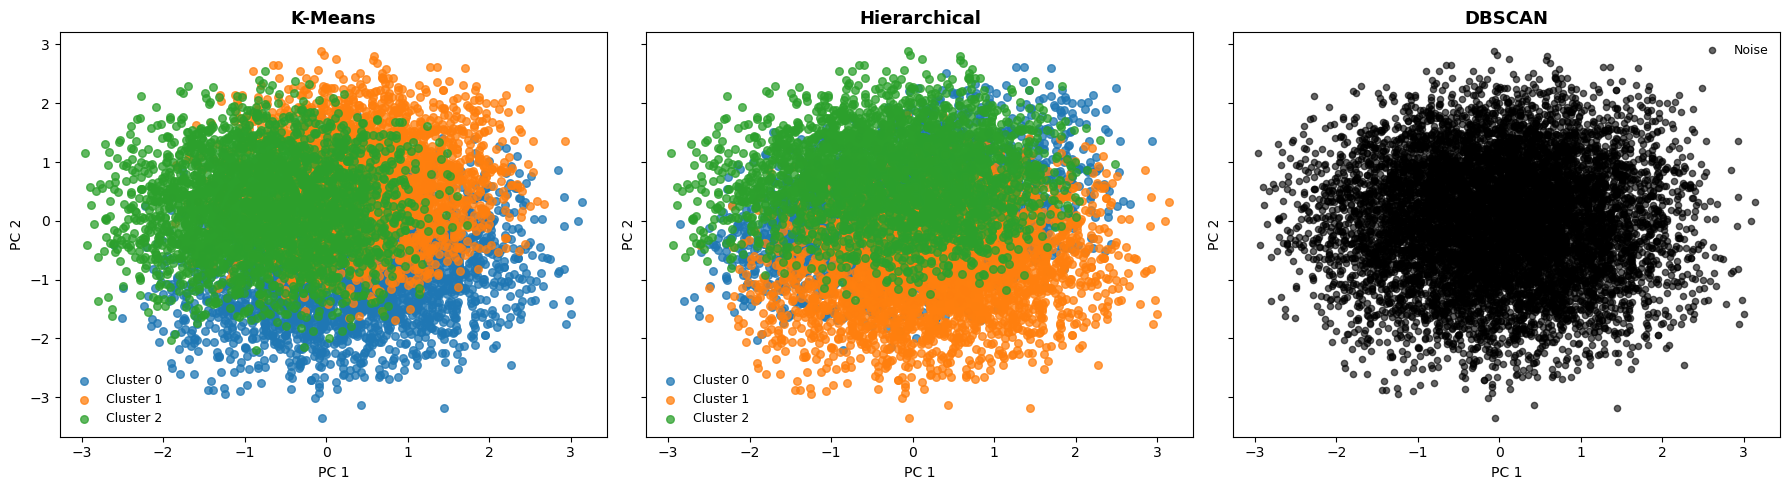

In [29]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(
    1, 3,
    figsize=(18, 5),
    sharex=True,
    sharey=True
)

for ax, (name, labels) in zip(axes, cluster_labels.items()):

    unique_labels = np.unique(labels)

    for label in unique_labels:
        mask = labels == label

        # Noise points for DBSCAN
        if label == -1:
            ax.scatter(
                x_pca_2d[mask, 0],
                x_pca_2d[mask, 1],
                c="black",
                s=20,
                alpha=0.6,
                label="Noise"
            )
        else:
            ax.scatter(
                x_pca_2d[mask, 0],
                x_pca_2d[mask, 1],
                s=30,
                alpha=0.75,
                label=f"Cluster {label}"
            )

    ax.set_title(name, fontsize=13, fontweight="bold")
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    ax.legend(frameon=False, fontsize=9)

plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

In [34]:
# Fit all clustering pipelines
fitted_models = {}

for name, pipe in pipelines.items():
    pipe.fit(x)
    fitted_models[name] = pipe

In [35]:
pca_loadings = {}

for name, pipe in fitted_models.items():
    pca = pipe.named_steps["pca"]
    
    loadings = pd.DataFrame(
        pca.components_.T,
        index=x.columns,
        columns=[f"PC{i+1}" for i in range(pca.n_components_)]
    )
    
    pca_loadings[name] = loadings


In [36]:
pca_variance = {}

for name, pipe in fitted_models.items():
    pca = pipe.named_steps["pca"]
    
    pca_variance[name] = pd.DataFrame({
        "PC": [f"PC{i+1}" for i in range(pca.n_components_)],
        "Explained_Variance": pca.explained_variance_ratio_
    })


In [37]:
from sklearn.metrics import pairwise_distances

def cluster_feature_importance(X_scaled, labels):
    
    # Exclude noise for DBSCAN
    unique_labels = np.unique(labels)
    unique_labels = unique_labels[unique_labels != -1]
    
    if len(unique_labels) <= 1:
        # Cannot compute importance if only 1 cluster
        return np.zeros(X_scaled.shape[1])
    
    # Compute centroids per cluster
    centroids = np.array([
        X_scaled[labels == lab].mean(axis=0)
        for lab in unique_labels
    ])
    
    # Feature-wise separation: mean pairwise centroid distance
    importance = np.mean(pairwise_distances(centroids, metric="euclidean"), axis=0)
    
    return importance


In [38]:
feature_importance = {}

for name, pipe in fitted_models.items():
    scaler = pipe.named_steps["scaler"]
    pca = pipe.named_steps["pca"]
    labels = pipe.named_steps["cluster"].labels_
    
    # Skip models with 1 cluster only
    if len(np.unique(labels)) <= 1:
        continue
    
    X_scaled = scaler.transform(x)
    X_pca = pca.transform(X_scaled)
    
    imp = cluster_feature_importance(X_pca, labels)
    
    feature_importance[name] = pd.Series(
        imp,
        index=[f"PC{i+1}" for i in range(len(imp))]
    ).sort_values(ascending=False)

# Example
feature_importance["KMeans"]

PC1    1.516346
PC3    1.342852
PC2    1.337085
dtype: float64

#### Cluster Importance

In [39]:
cluster_importance = {}

for name, pipe in fitted_models.items():
    scaler = pipe.named_steps["scaler"]
    pca = pipe.named_steps["pca"]
    labels = pipe.named_steps["cluster"].labels_

    if len(np.unique(labels)) <= 1:
        continue

    X_scaled = scaler.transform(x)
    X_pca = pca.transform(X_scaled)

    importance = cluster_feature_importance(X_pca, labels)

    cluster_importance[name] = pd.Series(
        importance,
        index=[f"PC{i+1}" for i in range(len(importance))]
    ).sort_values(ascending=False)

In [40]:
pca_strength = {}

for name, loadings in pca_loadings.items():
    pca_strength[name] = loadings.abs().mean(axis=0)

In [41]:
comparison_tables = {}

for name in cluster_importance.keys():
    df = pd.DataFrame({
        "Avg_Loading_Magnitude": pca_strength[name],
        "Cluster_Importance": cluster_importance[name]
    }).dropna()

    comparison_tables[name] = df

# Example
comparison_tables["KMeans"]


,Avg_Loading_Magnitude,Cluster_Importance
PC1,0.326429,1.516346
PC2,0.330840,1.337085
PC3,0.327038,1.342852


#### PCA Variance

In [42]:
pca_component_strength = {}

for name, loadings in pca_loadings.items():
    avg_loading = loadings.abs().mean(axis=0)
    pca_component_strength[name] = avg_loading


In [43]:
comparison_tables = {}

for name in feature_importance.keys():
    df = pd.DataFrame({
        "Avg_Loading_Magnitude": pca_component_strength[name],
        "Cluster_Importance": feature_importance[name]
    }).dropna()
    
    df["Correlation"] = df.corr().iloc[0, 1]
    comparison_tables[name] = df

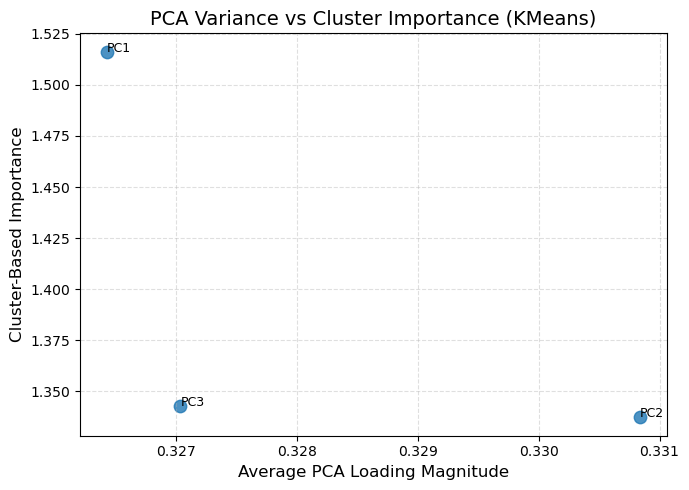

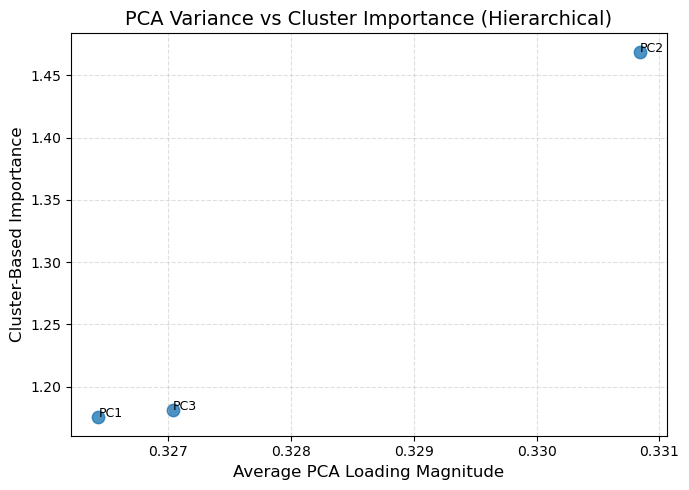

In [44]:
for name, df in comparison_tables.items():
    plt.figure(figsize=(7, 5))
    
    plt.scatter(
        df["Avg_Loading_Magnitude"],
        df["Cluster_Importance"],
        s=80,
        alpha=0.8
    )
    
    for pc in df.index:
        plt.text(
            df.loc[pc, "Avg_Loading_Magnitude"],
            df.loc[pc, "Cluster_Importance"],
            pc,
            fontsize=9
        )
    
    plt.xlabel("Average PCA Loading Magnitude", fontsize=12)
    plt.ylabel("Cluster-Based Importance", fontsize=12)
    plt.title(f"PCA Variance vs Cluster Importance ({name})", fontsize=14)
    
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()